In [1]:
#libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense , Dropout
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
from glob import glob  



In [2]:
train_path = "../input/fruits/fruits-360_dataset/fruits-360/Training"
test_path = "../input/fruits/fruits-360_dataset/fruits-360/Test"



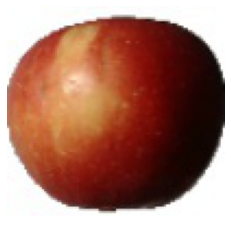

In [3]:
img = load_img(train_path + "/Apple Braeburn/0_100.jpg")
plt.imshow(img)
plt.axis("off")# eksen isimleri gizlendi.
plt.show()



In [4]:
x = img_to_array(img)
print(x.shape)


(100, 100, 3)


In [5]:

className = glob(train_path + '/*') # train dosyasının altında bulunan (/*) her dosyanın ismini className'in içine aktar. 
numberOfClass = len(className)
print("NumberOfClass : ", numberOfClass)

NumberOfClass :  131


In [6]:
# Dropout
# CNN MODEL
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output layer
model.add(Activation("softmax"))

2022-09-02 09:48:42.628147: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-02 09:48:42.767886: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-02 09:48:42.768781: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-02 09:48:42.770165: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [7]:
model.compile(loss = "categorical_crossentropy", # loss fonksiyonu softmax(mullticlass) kullanıldığı için categorical_crossentropy oldu
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [8]:
batch_size = 32 # 32 fotoğrafta bir aynı işlemler tekrarlanıyor.

In [9]:
# DATA GENERATION - train - test
train_data_generate = ImageDataGenerator(rescale = 1./255 ,
                          shear_range = 0.3 , # hafif bir açı ile döndürme
                          horizontal_flip= True,
                          zoom_range = 0.3)
test_data_generate = ImageDataGenerator(rescale = 1./255)

train_generator = train_data_generate.flow_from_directory(
    train_path, 
    target_size = x.shape[:2], # x.shape : (100,100,3) rgb'nin alınmasına gerek yok
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

test_generator = test_data_generate.flow_from_directory(
    test_path, 
    target_size = x.shape[:2], # x.shape : (100,100,3) rgb'nin alınmasına gerek yok
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [10]:
#fit
hist = model.fit_generator(
        generator = train_generator,
        steps_per_epoch = 1600 // batch_size,
        epochs = 100, 
        validation_data = test_generator,
        validation_steps = 800 // batch_size)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-09-02 09:48:58.500978: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-09-02 09:49:00.315610: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


50/50 [==============================] - 25s 340ms/step - loss: 4.6654 - accuracy: 0.0325 - val_loss: 4.1845 - val_accuracy: 0.0838
Epoch 2/100
50/50 [==============================] - 16s 315ms/step - loss: 3.9177 - accuracy: 0.1031 - val_loss: 3.4082 - val_accuracy: 0.1412
Epoch 3/100
50/50 [==============================] - 16s 316ms/step - loss: 3.2139 - accuracy: 0.1669 - val_loss: 2.5170 - val_accuracy: 0.3250
Epoch 4/100
50/50 [==============================] - 15s 300ms/step - loss: 2.5900 - accuracy: 0.2800 - val_loss: 2.0550 - val_accuracy: 0.4288
Epoch 5/100
50/50 [==============================] - 15s 298ms/step - loss: 2.1639 - accuracy: 0.3738 - val_loss: 2.1708 - val_accuracy: 0.3562
Epoch 6/100
50/50 [==============================] - 16s 316ms/step - loss: 1.8988 - accuracy: 0.4325 - val_loss: 1.2889 - val_accuracy: 0.6212
Epoch 7/100
50/50 [==============================] - 15s 302ms/step - loss: 1.5775 - accuracy: 0.5169 - val_loss: 1.0471 - val_accuracy: 0.6800
Epoc

In [11]:
# model save
model.save_weights("cnn_fruit_hist.h5")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


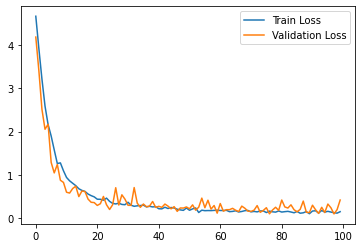

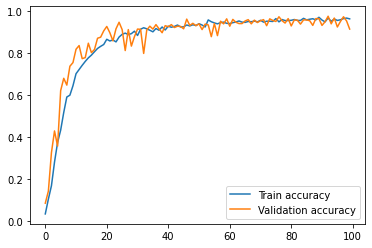

In [12]:
# model evaluation
print(hist.history.keys())
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label = "Train accuracy")
plt.plot(hist.history["val_accuracy"], label = "Validation accuracy")
plt.legend()
plt.show()

In [13]:
 # save history
import json
with open("cnn_fruit_hist.json" , "w") as f:
    json.dump(hist.history , f)

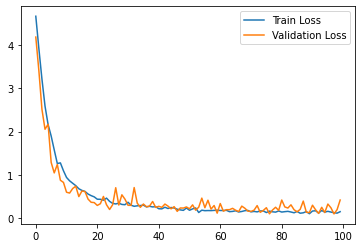

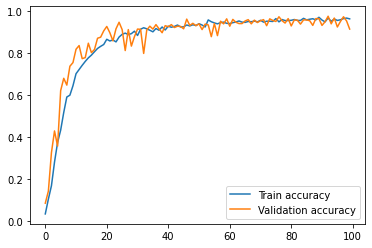

In [14]:
# load history 
import codecs
with codecs.open("./cnn_fruit_hist.json" , "r" , encoding="utf-8") as f:
    h = json.loads(f.read())
plt.plot(h["loss"], label = "Train Loss")
plt.plot(h["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(h["accuracy"], label = "Train accuracy")
plt.plot( h["val_accuracy"], label = "Validation accuracy")
plt.legend()
plt.show()
    
    